# PEFT integrations

PEFT'in pratik faydaları Difüzörler ve Transformatörler gibi diğer Hugging Face kütüphanelerine de uzanmaktadır. PEFT'in temel faydalarından biri, bir PEFT yöntemi tarafından oluşturulan bir adaptör dosyasının orijinal modelden çok daha küçük olmasıdır, **bu da birden fazla adaptörü yönetmeyi ve kullanmayı çok kolaylaştırır**. Çözdüğünüz görev için ince ayarlanmış yeni bir adaptör yükleyerek birden fazla görev için önceden eğitilmiş bir temel model kullanabilirsiniz. Ya da yeni efektler oluşturmak için birden fazla adaptörü bir metinden görüntüye difüzyon modeliyle birleştirebilirsiniz.

Bu eğitimde, PEFT'in Difüzörler ve Transformers'da adaptörleri yönetmenize nasıl yardımcı olabileceği gösterilecektir.

## Diffusers

Diffusers, difüzyon modelleriyle metin veya görüntülerden görüntüler ve videolar oluşturmak için üretken bir yapay zeka kütüphanesidir. LoRA, difüzyon modelleri için özellikle popüler bir eğitim yöntemidir çünkü yeni stillerde görüntüler oluşturmak için difüzyon modellerini çok hızlı bir şekilde eğitebilir ve paylaşabilirsiniz. Birden fazla LoRA modelini kullanmayı ve denemeyi kolaylaştırmak için Diffusers, çıkarım için farklı adaptörleri yönetmeye yardımcı olmak üzere PEFT kütüphanesini kullanır.

Örneğin, bir temel model yükleyin ve ardından **load_lora_weights** yöntemiyle çıkarım için **artificialguybr/3DRedmond-V1** adaptörünü yükleyin. Yükleme yöntemindeki adapter_name bağımsız değişkeni PEFT tarafından etkinleştirilir ve daha kolay başvurulabilmesi için bağdaştırıcı için bir ad belirlemenize olanak tanır.

In [1]:
!pip install -q diffusers["torch"] transformers peft

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2024-08-10 19:58:05.579432: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-10 19:58:05.579539: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-10 19:58:05.711811: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

(…)ond-3DRenderStyle-3DRenderAF.safetensors:   0%|          | 0.00/171M [00:00<?, ?B/s]

  0%|          | 0/50 [00:00<?, ?it/s]

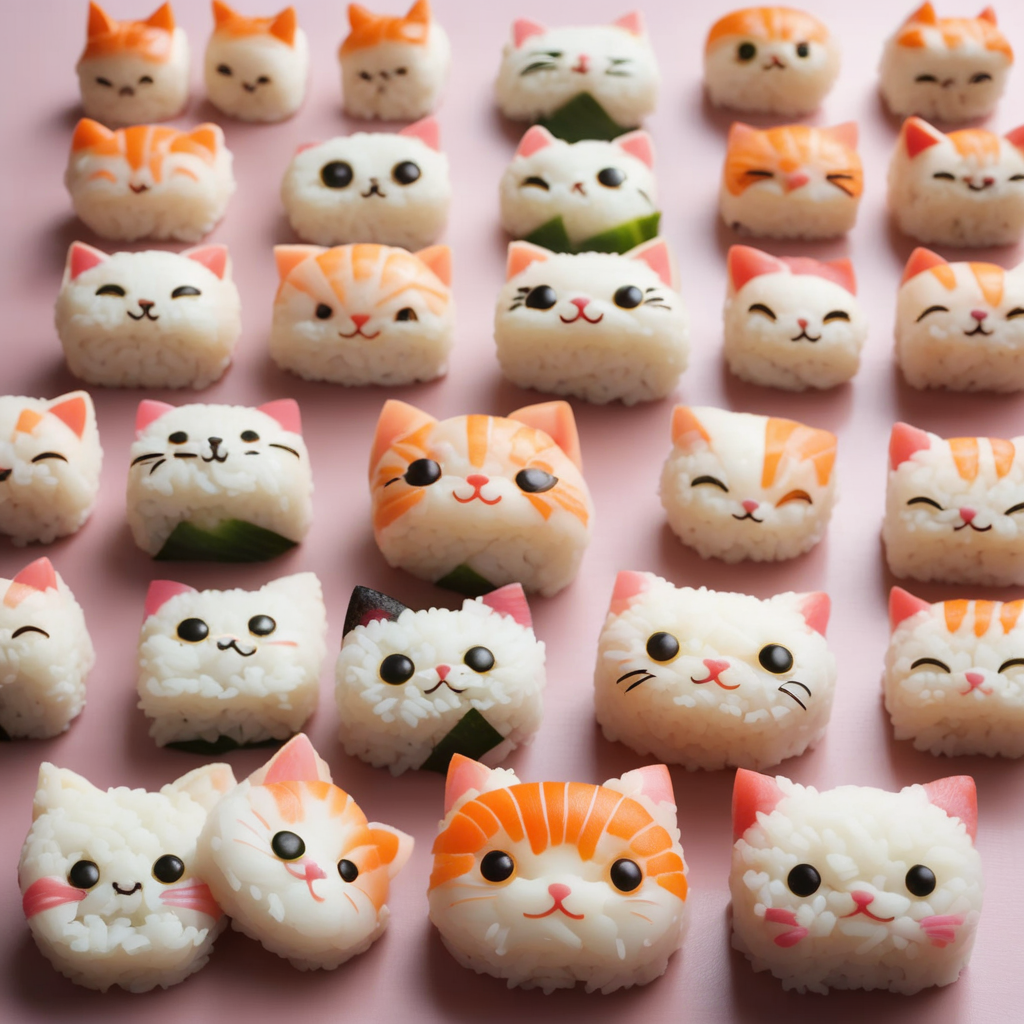

In [2]:
import torch

from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16
).to("cuda")

pipeline.load_lora_weights(
    "peft-internal-testing/artificialguybr__3DRedmond-V1", 
    weight_name="3DRedmond-3DRenderStyle-3DRenderAF.safetensors", 
    adapter_name="3d"
)
image = pipeline("sushi rolls shaped like kawaii cat faces").images[0]
image

Şimdi başka bir harika LoRA modeli olan ostris/super-cereal-sdxl-lora'yı deneyelim. Tek yapmanız gereken bu yeni adaptörü yükleyip adapter_name ile adlandırmak ve set_adapters yöntemini kullanarak o anda etkin adaptör olarak ayarlamaktır.

cereal_box_sdxl_v1.safetensors:   0%|          | 0.00/218M [00:00<?, ?B/s]

  0%|          | 0/50 [00:00<?, ?it/s]

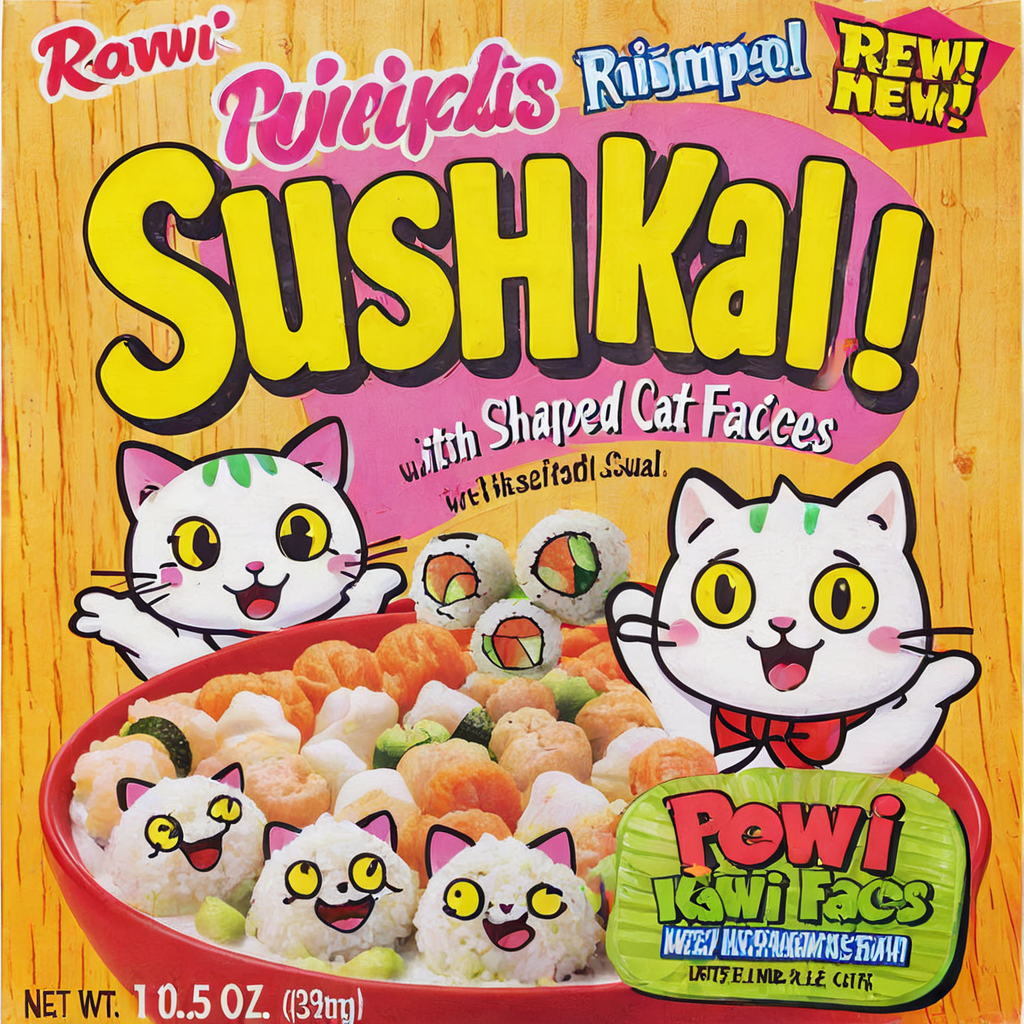

In [3]:
pipeline.load_lora_weights(
    "ostris/super-cereal-sdxl-lora", 
    weight_name="cereal_box_sdxl_v1.safetensors", 
    adapter_name="cereal"
)
pipeline.set_adapters("cereal")
image = pipeline("sushi rolls shaped like kawaii cat faces").images[0]
image

In [4]:
pipeline.disable_lora()

## Transformers

Transformers, tüm modalitelerdeki her tür görev için önceden eğitilmiş modellerden oluşan bir koleksiyondur. Bu modelleri eğitim veya çıkarım için yükleyebilirsiniz. Modellerin çoğu büyük dil modelleridir (LLM'ler), bu nedenle uyarlayıcıları yönetmek ve eğitmek için PEFT'i Transformers ile entegre etmek mantıklıdır.

In [5]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("facebook/opt-350m")

config.json:   0%|          | 0.00/644 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/663M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [9]:
peft_config = LoraConfig(
    lora_alpha=16,
    lora_dropout=0.1,
    r=64,
    bias="none",
    task_type="CAUSAL_LM"
)
model.add_adapter(peft_config)

Artık modeli Transformer'ın Trainer sınıfı veya tercih ettiğiniz eğitim çerçevesi ile eğitebilirsiniz.

Yeni eğitilen modeli çıkarım için kullanmak üzere AutoModel sınıfı, adaptör ağırlıklarını ve yapılandırma dosyasını önceden eğitilmiş temel bir modele yüklemek için arka uçta PEFT kullanır.

In [12]:
# from transformers import AutoModelForCausalLM

# model = AutoModelForCausalLM.from_pretrained("peft-internal-testing/opt-350m-lora")

# or

from transformers import pipeline

model = pipeline("text-generation", "peft-internal-testing/opt-350m-lora")
print(model("Hello World"))

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'generated_text': 'Hello World!\n\nHello World is a new game from the developer of the popular game, The'}]


Birden fazla adaptörü karşılaştırmak veya kullanmakla ilgileniyorsanız, adaptör yapılandırmasını temel modele eklemek için **add_adapter()** yöntemini çağırabilirsiniz. **Tek gereklilik adaptör tipinin aynı olmasıdır** (LoRA ve LoHa adaptörünü karıştıramazsınız).

In [14]:
model = AutoModelForCausalLM.from_pretrained("facebook/opt-350m")
model.add_adapter(lora_config_1, adapter_name="adapter_1")
model.add_adapter(lora_config_2, adapter_name="adapter_2")

model.set_adapter("adapter_1")
output = model.generate(**inputs)
print(tokenizer.decode(output_disabled[0], skip_special_tokens=True))

model.disable_adapters()